In [1]:
#本文是kmeans算法的实现
#load data
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = sio.loadmat('ex7data2.mat')
X = data['X']
print(X)
plt.scatter(X[:,0],X[:,1],marker='x',color = 'r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]
 [ 1.24792268  4.93267846]
 [ 1.97619886  4.43489674]
 [ 2.23454135  5.05547168]
 [ 2.98340757  4.84046406]
 [ 2.97970391  4.80671081]
 [ 2.11496411  5.37373587]
 [ 2.12169543  5.20854212]
 [ 1.5143529   4.77003303]
 [ 2.16979227  5.27435354]
 [ 0.41852373  4.88312522]
 [ 2.47053695  4.80418944]
 [ 4.06069132  4.99503862]
 [ 3.00708934  4.67897758]
 [ 0.66632346  4.87187949]
 [ 3.1621865   4.83658301]
 [ 0.51155258  4.91052923]
 [ 3.1342801   4.96178114]
 [ 2.04974595  5.6241395 ]
 [ 0.66582785  5.24399257]
 [ 1.01732013  4.84473647]
 [ 2.17893568  5.29758701]
 [ 2.85962615  5.26041997]
 [ 1.30882588  5.30158701]
 [ 0.99253246  5.01567424]
 [ 1.40372638  4.57527684]
 [ 2.66046572  5.19623848]
 [ 2.79995882  5.11526323]
 [ 2.06995345  4.6846713 ]
 [ 3.29765181  5.59205535]
 [ 1.8929766   4.89043209]
 [ 2.55983064  5.26397756]
 [ 1.15354031  4.67866717]
 

<Figure size 640x480 with 1 Axes>

In [2]:
#计算距离
def computeDistance(A,B):
    return np.sqrt(np.sum(np.square(A-B)))
#为数据集x找到最近的质心   
def findClosestCentroids(x,centroids):
    k = centroids.shape[0]
    m = x.shape[0]
    idx = np.zeros((x.shape[0],1))
    for i in range(m):
        minDist = np.inf
        minIndex = -1
        for j in range(K):
            distance = computeDistance(x[i,:],centroids[j,:])
            if distance<minDist:
                minDist = distance
                minIndex = j
        idx[i,:] = minIndex
    return idx

In [3]:
# compute the mean of the data ,it is centroids
# 计算data的均值，改变centroids
def change_centroids(x,idx,K=3):
    m,n = x.shape
    centroids = np.zeros((K,n))
    for i in range(K):
        index = np.where(idx.ravel() == i)
        centroids[i] = np.mean(x[index],axis=0)
    return centroids

In [4]:
# 一开始应该随机初始化centroids
def randCentroids(x,k=3):
    m,n = x.shape
    centroids = np.zeros((k,n))
    randIndex = np.random.choice(m,k)
    centroids = x[randIndex]
    return centroids

# 定义kmeans class  
class Kmeans(object):
    def __init__(self):
        pass
    def runKmeans(self,data,init_centroids,iers=10,k=3):
        idx = None
        centroids = None
        #记录一下每个质心的变化
        cent0 = np.zeros((iers,initial_centroids.shape[1]))
        cent1 = np.zeros((iers,initial_centroids.shape[1]))
        cent2 = np.zeros((iers,initial_centroids.shape[1]))
        for i in range(iers):
            idx = findClosestCentroids(data,init_centroids)
            centroids = change_centroids(data,idx,k)
            init_centroids = centroids
            cent0[i,:] = centroids[0,:]
            cent1[i,:] = centroids[1,:]
            cent2[i,:] = centroids[2,:]
        return idx,centroids,cent0,cent1,cent2


    

In [5]:
# 全局变量
K = 3 #聚类数
initial_centroids = randCentroids(X) #聚类中心点

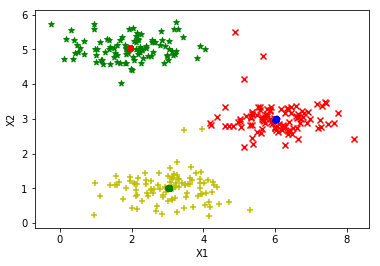

In [6]:
#用初始化的centroids测试一下聚类的过程和结果
kmeans = Kmeans()
idx,centroids,cent0,cent1,cent2 = kmeans.runKmeans(X,initial_centroids)
idx0 = np.where(idx.ravel()==0)
idx1 = np.where(idx.ravel()==1)
idx2 = np.where(idx.ravel()==2)
plt.scatter(X[idx0,0],X[idx0,1],marker='x',color = 'r')
plt.scatter(X[idx1,0],X[idx1,1],marker='*',color = 'g')
plt.scatter(X[idx2,0],X[idx2,1],marker='+',color = 'y')
#plt.scatter(centroids[:,0],centroids[:,1],marker='o',color = 'cyan')
#plt.scatter(initial_centroids[:,0],initial_centroids[:,1],\
#            marker='^',color = 'black',linewidths=10)
plt.plot(cent0[:,0],cent0[:,1],"b-o")
plt.plot(cent1[:,0],cent1[:,1],"r-o")
plt.plot(cent2[:,0],cent2[:,1],"g-o")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()